# Bike의 특징

 - 대용량 데이터
 - 숫자 데이터 중심 (date만 제외)
 - NaN 같은 게 없음
 - 3가지 lable이 있음 (비회원 이용량, 회원 이용량)
 - 비회원과 회원을 따로 추측하고, 이를 합산한 것으로 하는게 좋다.
 
 
 - _

- holiday (1은 공휴일)
- weather (4가 매우 안좋은 날씨)
- atemp (체감)

- weather와 season은 연산하는게 아니므로, 원핫인코딩하는게 좋음
- (원핫인코딩하면 점수가 오를수도 있다. 항상 오르는 건 아니다)

# 패키지로딩

In [1]:
print("테스트")

import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import os

테스트


# 데이터 로딩

In [5]:
train = pd.read_csv("d:/python/data/bike/train_better.csv", parse_dates = ["datetime"])
test = pd.read_csv("d:/python/data/bike/test_better.csv", parse_dates = ["datetime"])

print(train.shape, test.shape)

#assert train.shape == (10886, 12)
#assert test.shape == (6493, 9)

train.head()
test.head()

(10886, 13) (6493, 10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,windspeed_encode
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,10.66
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,10.66
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,10.66
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,10.66
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,10.66


# Seaborn

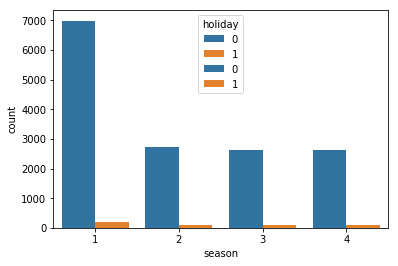

In [6]:
# 시각화 결과를 화면에 바로 출력할 수도, 파일로 저장할 수 있음

%matplotlib inline  
# 시각화결과를 주피터노트북에서 바로 보여줘라.

sns.countplot(data = train, x = "weather", hue = "holiday") 
# hue는 x를 이걸로 쪼개서 보여주세요.

sns.countplot(data = train, x = "season", hue = "holiday")

# 데이터전처리(wind 이상값 처리) - 엑셀로

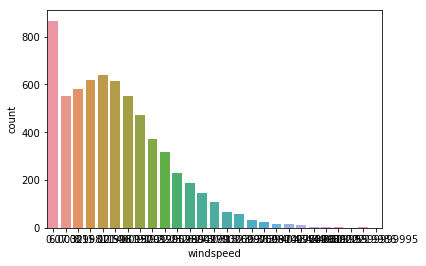

In [7]:
#sns.countplot(data = train, x = "windspeed")
sns.countplot(data = test, x = "windspeed")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,windspeed_encode


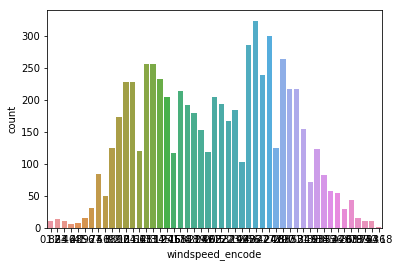

In [8]:
#sns.countplot(data = train, x = "windspeed_encode")
sns.countplot(data = test, x = "windspeed_encode")
test.loc[test["windspeed_encode"] == 0]

# 0으로 된 것은 없다.

# 데이터전처리(atemp 이상값 처리)

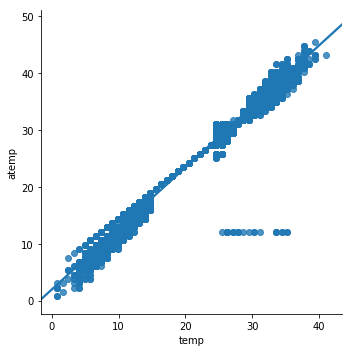

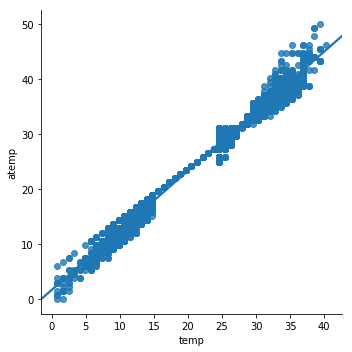

In [9]:
sns.lmplot(data = train, x = "temp", y ="atemp")
sns.lmplot(data = test, x = "temp", y ="atemp")

In [10]:
##### train

train["atemp_gap"] = train["atemp"] - train["temp"]
train["atemp_gap"].describe()
train["atemp_gap"].max()

train["atemp_encode"] = train["atemp"]
train.loc[train["atemp_gap"] < -2, "atemp_encode"] = train["temp"] + 3

# 제대로 처리됐는지 체크

train["atemp_gap2"] = train["atemp_encode"] - train["temp"]
train.loc[train["atemp_gap2"] < -2]

# train[["temp", "atemp", "atemp_encode"]]


##### test

test["atemp_gap"] = test["atemp"] - test["temp"]
test["atemp_gap"].describe()
test["atemp_gap"].max()

test["atemp_encode"] = test["atemp"]
test.loc[train["atemp_gap"] < -2, "atemp_encode"] = test["temp"] + 3

# 제대로 처리됐는지 체크

test["atemp_gap2"] = test["atemp_encode"] - test["temp"]
test.loc[train["atemp_gap2"] < -2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,windspeed_encode,atemp_gap,atemp_encode,atemp_gap2


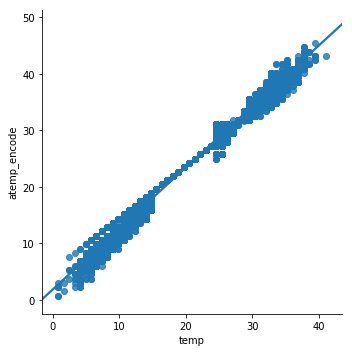

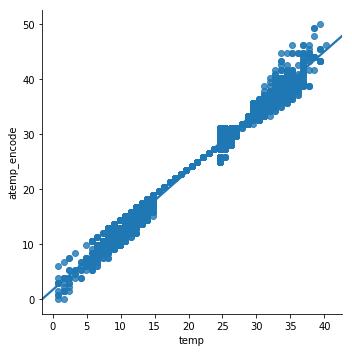

In [11]:
# 제대로 처리됐는지 체크
sns.lmplot(data = train, x = "temp", y ="atemp_encode")
sns.lmplot(data = test, x = "temp", y ="atemp_encode")

# 데이터전처리(날짜 구분)

In [12]:
# train 

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month # day를 뺐음
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute

train.shape
train.head()

# test

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month # day를 뺐음
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute

test.shape
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,windspeed_encode,atemp_gap,atemp_encode,atemp_gap2,year,month,hour,minute
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,10.66,0.705,11.365,0.705,2011,1,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,10.66,2.975,13.635,2.975,2011,1,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,10.66,2.975,13.635,2.975,2011,1,2,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,10.66,2.220,12.880,2.220,2011,1,3,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,10.66,2.220,12.880,2.220,2011,1,4,0


# 데이터 전처리(NaN) - 진단

In [13]:
# 정량

train.describe()
# 없음
test.describe()
# 없음

train.columns
# datetime, casual, registerd, count

test.columns
#train[["datetime", "casual", "registerd", "count"]].describe()
#test[["datetime", "casual", "count"]].describe()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'windspeed_encode', 'atemp_gap',
       'atemp_encode', 'atemp_gap2', 'year', 'month', 'hour', 'minute'],
      dtype='object')

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model = DecisionTreeClassifier(max_depth = 8, random_state = 0)
# model = DecisionTreeClassifier()
# model = DecisionTreeRegressor(random_state = 79)

model = RandomForestRegressor(random_state = 79)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

In [27]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp_encode', 'humidity', 'windspeed_encode', 'year', 'month', 'hour', 'minute']
        # windspeed => windspeed_encode

feature_names4 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp_encode', 'humidity', 'windspeed', 'year', 'month', 'hour', 'minute']
        # atemp => atemp_encode

feature_names3 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'minute']
        # datetime 처리
    
feature_names2 = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']

feature_names1 = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'] # datetime 에러


lable_name = "count"
lable_name

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train[lable_name]

print(X_train.shape)

test.columns

(10886, 12)


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'windspeed_encode', 'atemp_gap',
       'atemp_encode', 'atemp_gap2', 'year', 'month', 'hour', 'minute'],
      dtype='object')

# Model Evaluation - Cross Val.

In [19]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv = 20)

# train 데이터 내에서 대여량 예측값이 나옴

print(y_predict.shape)
y_predict

(10886,)


array([ 34.1,  23.1,  26.2, ..., 195.2, 169.9, 128.2])

In [25]:
y_train.shape

(10886,)

# Evalution Metric - Mean Absolute Error

In [21]:
score = np.abs(y_predict - y_train).mean()
score

34.45627135770732

In [22]:
print(f"Score = {score}") # 신버전 파이썬만
print(f"Score = {score:.5f}") # 소수점 5짜리까지
print("Score = {:.5f}".format(score)) # 구버전인 경우.. 추천하지는 않음

# 할 때마다 점수가 다를 수도 있는데, 
# 이는 degression의 prediction을 random을 고정시키는 게 좋다.

Score = 34.45627135770732
Score = 34.45627
Score = 34.45627


## 기존 Score: 129
## 날짜 세분화: 34
## atemp 보정: 34
- 이는 train에는 있는데, test 데이터에 atemp 이상값이 없기 때문

## windspeed 보정: 34

In [15]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=79, verbose=0, warm_start=False)

# Feature selection & Accuracy

In [16]:
print(list(zip(feature_names, model.feature_importances_))) # fit한 다음에 사용해야 함
print("Train Set Accuracy = ", model.score(X_train, y_train))

[('season', 0.008278529370703423), ('holiday', 0.0027499546630866557), ('workingday', 0.0651521071054892), ('weather', 0.01519797345272073), ('temp', 0.04377398080592716), ('atemp_encode', 0.07211220605944954), ('humidity', 0.03139129723405571), ('windspeed_encode', 0.01144680479489557), ('year', 0.08459516023547942), ('month', 0.04618863432609904), ('hour', 0.6191133519520935), ('minute', 0.0)]
Train Set Accuracy =  0.9892732948582187


# Graphviz

In [17]:
'''
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                          feature_names = feature_names,
                          class_names = ["Non-Rent", "Rent"],
                          out_file = None)

graphviz.Source(dot_tree)
'''

'\nimport graphviz\nfrom sklearn.tree import export_graphviz\n\ndot_tree = export_graphviz(model,\n                          feature_names = feature_names,\n                          class_names = ["Non-Rent", "Rent"],\n                          out_file = None)\n\ngraphviz.Source(dot_tree)\n'

# Predict

In [18]:
predictions = model.predict(X_test)

print(predictions.shape)

print(test.shape)

(6493,)
(6493, 17)


# Submit

In [19]:
submission = pd.read_csv("data/bike/sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,9.8
1,2011-01-20 01:00:00,4.9
2,2011-01-20 02:00:00,4.8
3,2011-01-20 03:00:00,3.8
4,2011-01-20 04:00:00,3.1


In [20]:
submission.to_csv("data/bike/bike_predictions_20180902_regressor_rf_datetime.csv", index = False)
# index가 자동으로 들어가는데, 이것을 빼고 싶으면 index False를 지정해주면 됨

# Kaggle Score

- 0에 가까워야 좋은 점수. 1위는 0.3점대

- 점수 1.70229 (DecisionTreeClassifier)

- 점수 1.62 (DecisionTreeRegression)

- 점수 1.38 (RandomForest)

- 점수 0.48 (datetime을 세분화)

- 점수 0.48 (windspeed 0 --> 주위 평균치)


- 0.4 중반대 정도를 목표로 함

## 정석 Tip

### (1) 코드 안짜는 시기 (2일~7일)... 데이터를 완벽하게 이해하기까지
- (e.g. 엑셀, 시각화 등)
- 0이라고 되어 있는데, 실제로는 NaN인 경우가 있음 (예. windspeed)
- lmplot으로 상관관계있는 변수들을 보완해주면 (예. temp, atemp)

### (2) Kernel과 Discussion을 적극적으로 참고해서 한다
- 기업에서 일하는 경우에는 더더욱 그렇다
- 비슷한 캐글 2~3개 사례를 참고하는 것

## 속성 Tip

### (1) datetime을 처리하면 parse로..

### (2) 피처에 넣으면, 오히려 역효과 나는 피처가 있음. 그건 빼줘야
- CV가 안좋아졌는데, 실제로는 좋아지는 경우도, 반대도 있음

### (3) 원핫인코딩 (Embarked처럼)




## MY
- cross val 잘 나눠주는게 좋음
